In [12]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_blobs(n_samples=1000, n_features=2, centers=3)

In [3]:
X

array([[ 9.05936644, -0.9082976 ],
       [ 7.81339597, -1.25111459],
       [ 8.68692513, -2.72783284],
       ...,
       [ 9.62583067,  0.67210008],
       [ 6.93715937, -2.27637632],
       [-6.42152807,  1.08057761]])

In [4]:
y

array([0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2,
       1, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1,
       1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0,
       2, 0, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 2, 1,
       0, 0, 1, 2, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0,
       0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 2,
       2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0,
       1, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0,
       2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1,

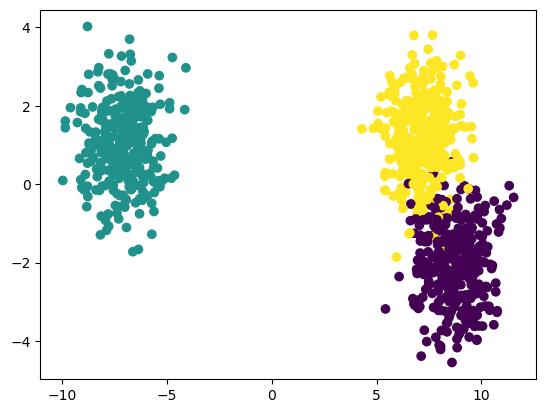

In [11]:
plt.scatter(X[:,0],X[:,1], c = y)


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.33, random_state=32)

In [15]:
from sklearn.cluster import KMeans

In [16]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

In [17]:
wcss

[37121.445067070556,
 2707.7801078831317,
 1285.453370768549,
 1125.972930951563,
 971.8248335039385,
 832.4592856621825,
 731.231721342934,
 635.201005322255,
 563.2812775291237,
 515.6614330075122]

Text(0, 0.5, 'wcss')

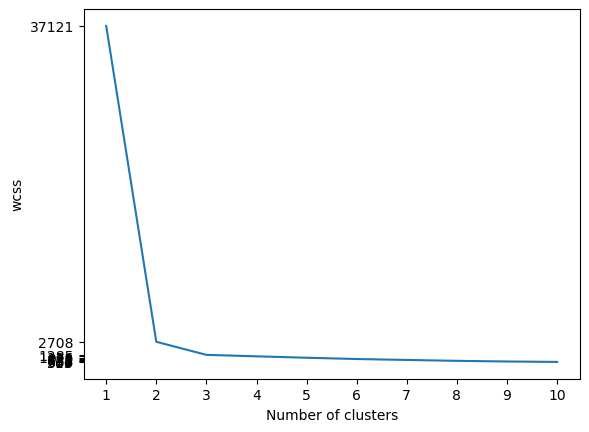

In [19]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.yticks(wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

In [36]:
kmeans = KMeans(n_clusters=4, init='k-means++')

In [33]:
kmeans.inertia_

AttributeError: 'KMeans' object has no attribute 'inertia_'

In [37]:
y_labels = kmeans.fit_predict(X_train)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


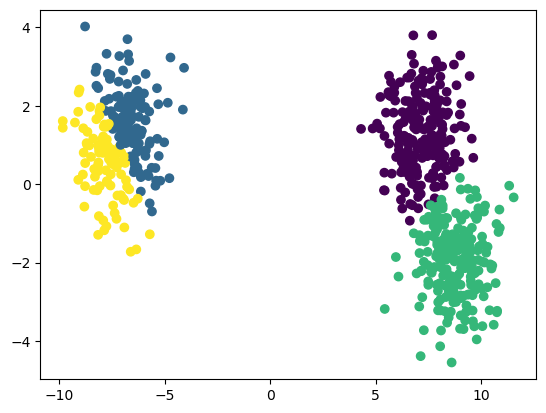

In [38]:
plt.scatter(X_train[:,0],X_train[:,1], c = y_labels)

In [27]:
from kneed import KneeLocator

In [30]:
k1 = KneeLocator(range(1,11),wcss, curve='convex', direction='decreasing')

In [31]:
k1.elbow

2

In [39]:
from sklearn.metrics import silhouette_score